# Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
%cd /content/drive/MyDrive/045143/HW1/image/

/content/drive/MyDrive/045143/HW1/image


# Image function

In [ ]:
# Read image function
def read_image(image_path): 
  image = cv2.imread(image_path) 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

In [ ]:
# Spatial Filter
def spatial_filter(image, kernel, padding=0):
  H, W = image.shape
  kernel_size = kernel.shape[0]
  pad_size = (kernel_size - 1)//2

  if padding:
    pad_matrix = np.zeros((H + 2*pad_size, W + 2*pad_size))
    pad_matrix[pad_size: H + pad_size, pad_size: W + pad_size] = image
    image = pad_matrix
    out_image = np.zeros((H, W))
  else:
    out_image = np.zeros((H - 2*pad_size, W - 2*pad_size))

  for y in range(W): 
    for x in range(H):
      try:
        out_image[x, y] = np.sum((kernel * image[x: x + kernel_size, y: y + kernel_size]))
      except:
        # if not padding, error with some pixels of edge
        break

  return out_image

# Average filter

## Function

In [ ]:
# Average filter
def average(image, kernel_size=3, padding=1):
  kernel = np.ones((kernel_size, kernel_size))
  kernel = kernel / (kernel_size*kernel_size)

  out_image = spatial_filter(image, kernel, padding)
  return out_image

# Weighted average
def weight_average(image, kernel_size=3, padding=1):
  if kernel_size==3:
    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
  if kernel_size==5:
    kernel = np.array([[1, 4, 7, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4], [1, 4, 7, 4, 1]]) / 273

  out_image = spatial_filter(image, kernel, padding)
  return out_image

## Result

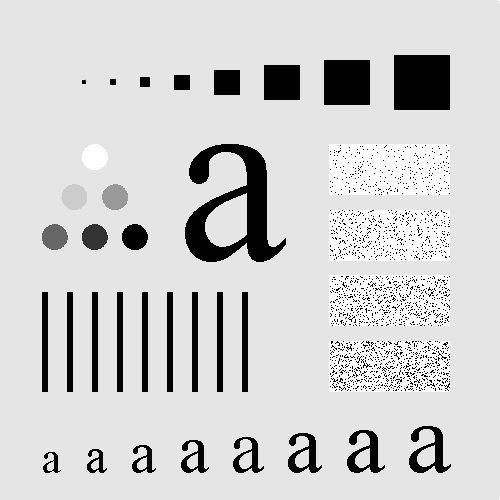

In [ ]:
image = read_image('1.tif')
cv2_imshow(image)

- **Average filter with kernel size 3x3**

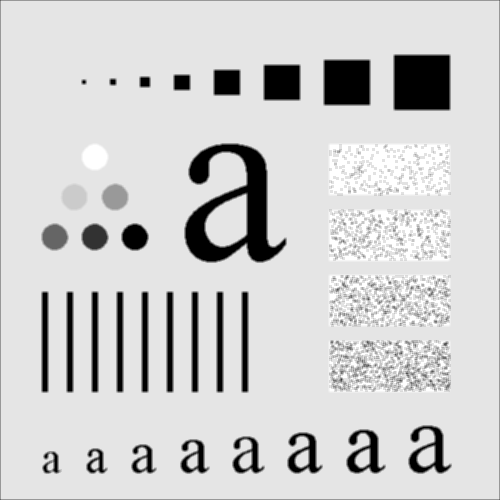

In [ ]:
image_1 = average(image, kernel_size=3, padding=1)
cv2_imshow(image_1)

- **Average filter with kernel size 11x11**

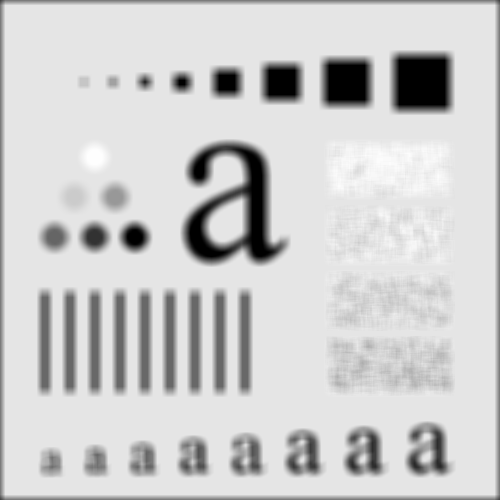

In [ ]:
image_2 = average(image, kernel_size=11, padding=1)
cv2_imshow(image_2)

- **Average filter with kernel size 21x21**

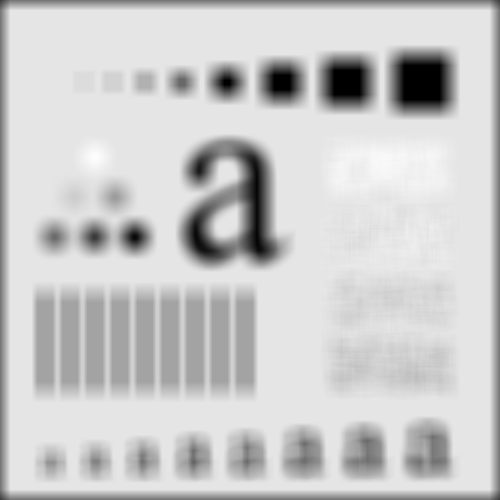

In [ ]:
image_3 = average(image, kernel_size=21, padding=1)
cv2_imshow(image_3)

- **Weight average filter with kernel_size 3x3**

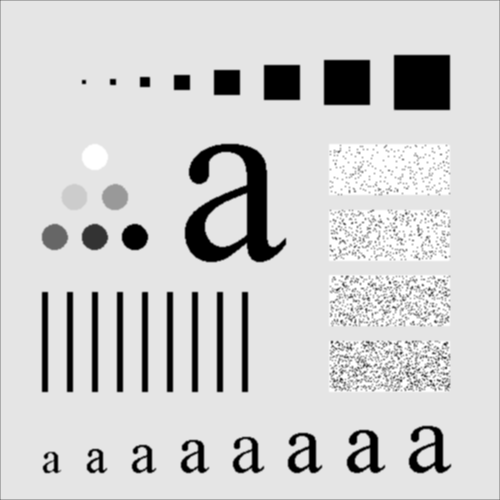

In [ ]:
image_4 = weight_average(image, kernel_size=3, padding=1)
cv2_imshow(image_4)

- **Weight average filter with kernel_size 5x5**

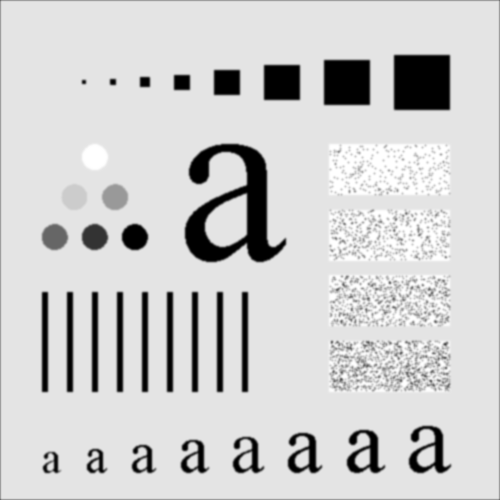

In [ ]:
image_5 = weight_average(image, kernel_size=5, padding=1)
cv2_imshow(image_5)

# Median Filter

## Function

In [ ]:
def median_filter(image, kernel_size=3, padding=1):
  H, W = image.shape
  pad_size = (kernel_size - 1)//2
  temp = []

  if padding:
    pad_matrix = np.zeros((H + 2*pad_size, W + 2*pad_size))
    pad_matrix[pad_size: H + pad_size, pad_size: W + pad_size] = image
    image = pad_matrix
    out_image = np.zeros((H, W))
  else:
    out_image = np.zeros((H - 2*pad_size, W - 2*pad_size))

  for y in range(W): 
    for x in range(H):
      try:
        for z in range(kernel_size):
          for t in range(kernel_size):
            temp.append(image[x + z, y + t])
        # temp = list(set(temp))
        temp.sort()
        out_image[x][y] = temp[len(temp) // 2]
        temp = []
      except:
        # if not padding, error with some pixels of edge
        break
  return out_image

## Result

- Load image

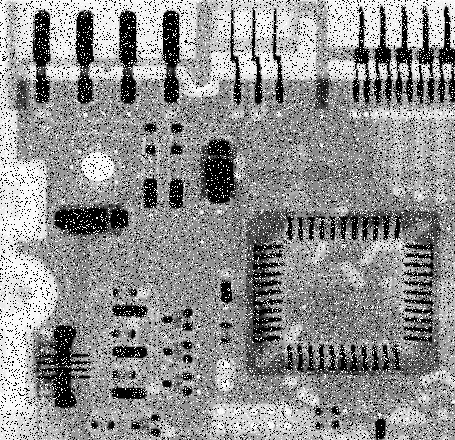

In [ ]:
image = read_image('2.tif')
cv2_imshow(image)

- **Median filter with kernel size 3x3**. The salt-and-pepper noise is still available.

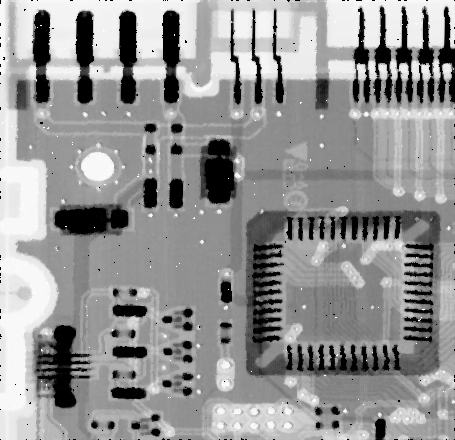

In [ ]:
image_1 = median_filter(image, kernel_size=3, padding=1)
cv2_imshow(image_1)

- **Median filter with kernel size 7x7**

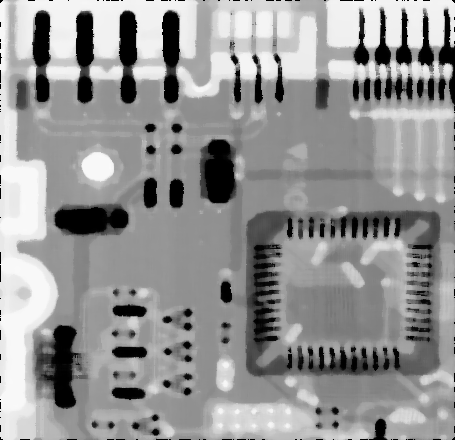

In [ ]:
image_1 = median_filter(image, kernel_size=7, padding=1)
cv2_imshow(image_1)

# Max filter

## Function

In [ ]:
def max_filter(image, kernel_size=3, padding=0):
  H, W = image.shape
  pad_size = (kernel_size - 1)//2
  temp = []

  if padding:
    pad_matrix = np.zeros((H + 2*pad_size, W + 2*pad_size))
    pad_matrix[pad_size: H + pad_size, pad_size: W + pad_size] = image
    image = pad_matrix
    out_image = np.zeros((H, W))
  else:
    out_image = np.zeros((H - 2*pad_size, W - 2*pad_size))

  for y in range(W): 
    for x in range(H):
      try:
        for z in range(kernel_size):
          for t in range(kernel_size):
            temp.append(image[x + z, y + t])
        temp = list(set(temp))
        temp.sort()
        out_image[x][y] = temp[-1]
        temp = []
      except:
        # if not padding, error with some pixels of edge
        break
  return out_image

## Result

- Loag image

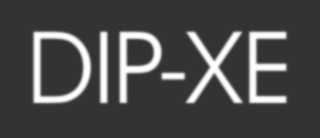

In [ ]:
image = read_image('3.tif')
cv2_imshow(image)

- **Max filter with kernel size 5x5**. The font of text become bold.

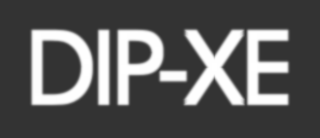

In [ ]:
image_1 = max_filter(image, kernel_size=5, padding=1)
cv2_imshow(image_1)

# Min Filter

## Function

In [ ]:
def min_filter(image, kernel_size=3, padding=0):
  H, W = image.shape
  pad_size = (kernel_size - 1)//2
  temp = []

  if padding:
    pad_matrix = np.zeros((H + 2*pad_size, W + 2*pad_size))
    pad_matrix[pad_size: H + pad_size, pad_size: W + pad_size] = image
    image = pad_matrix
    out_image = np.zeros((H, W))
  else:
    out_image = np.zeros((H - 2*pad_size, W - 2*pad_size))

  for y in range(W): 
    for x in range(H):
      try:
        for z in range(kernel_size):
          for t in range(kernel_size):
            temp.append(image[x + z, y + t])
        temp = list(set(temp))
        temp.sort()
        out_image[x][y] = temp[0]
        temp = []
      except:
        # if not padding, error with some pixels of edge
        break
  return out_image

## Result

- Load image

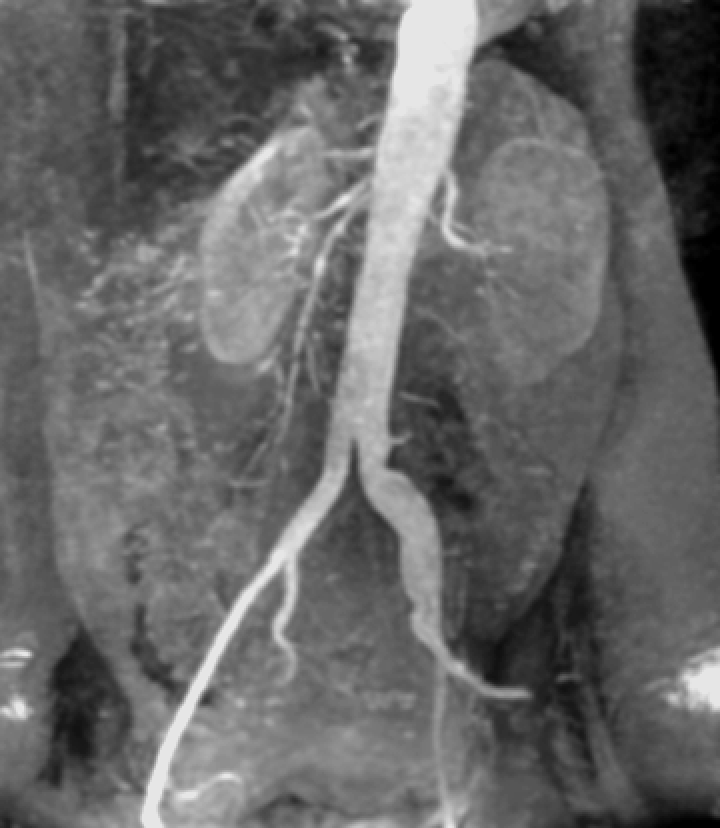

In [ ]:
image = read_image('4.tif')
cv2_imshow(image)

- **Min filter with kernel size 11x11**

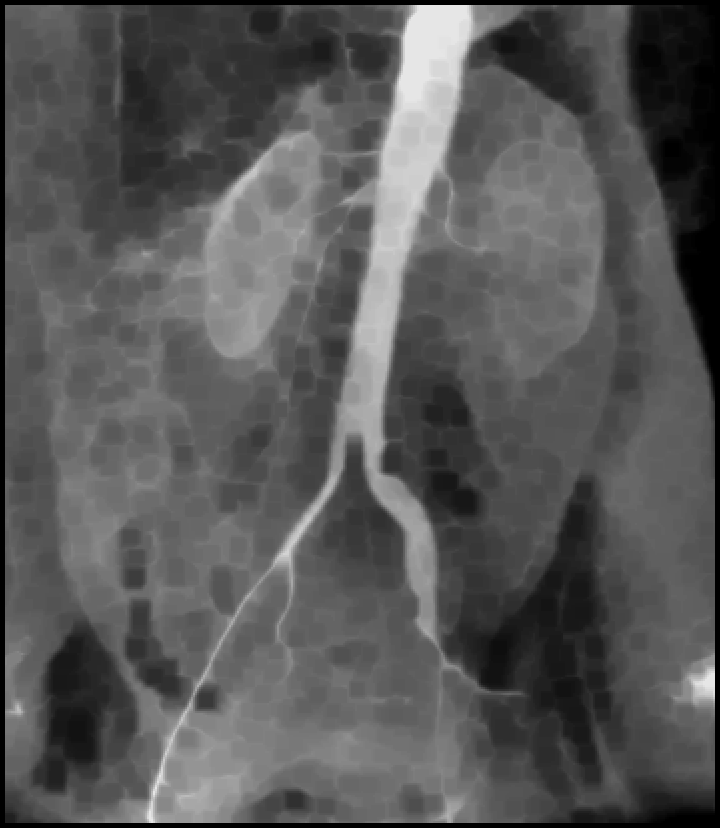

In [ ]:
image_1 = min_filter(image, kernel_size=11, padding=1)
cv2_imshow(image_1)

# Laplacian

## Function

In [ ]:
# Laplacian
def laplacian(image, padding=1, type=0):
  if type==0:
    kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
  else:
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
  
  out_image = spatial_filter(image, kernel, padding)
  return out_image

## Result

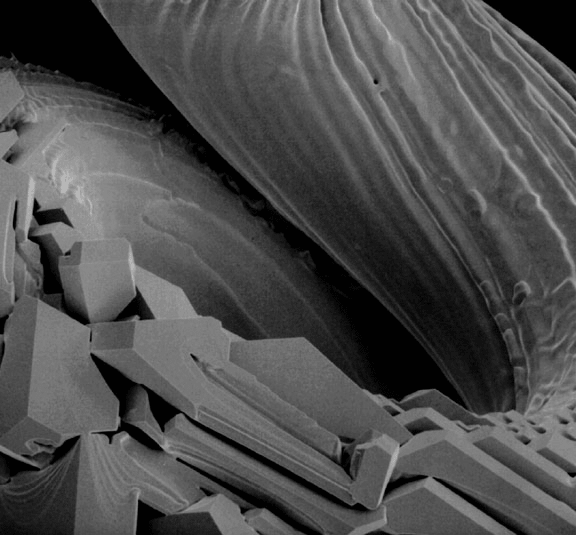

In [ ]:
image = read_image('5.png')
cv2_imshow(image)

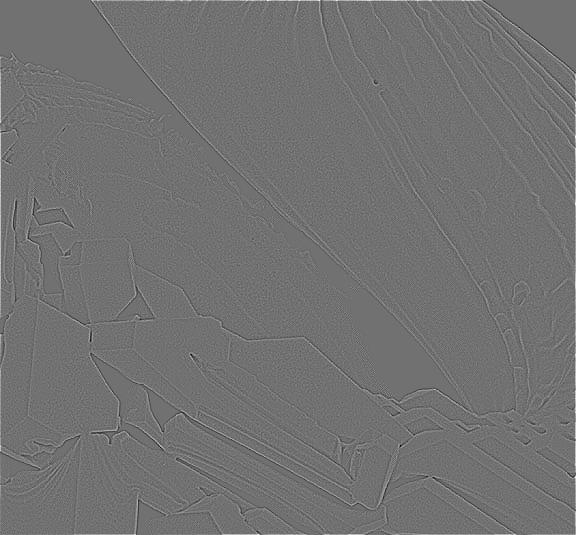

In [ ]:
image_1 = laplacian(image, padding=1, type=0)
# Scale for display only
image_1 = (image_1 -image_1.min()) / (image_1.max() - image_1.min())*255
cv2_imshow(image_1)

- **Composite Laplacian** with filter 
$ \begin{pmatrix}
  0 & -1 & 0 \\
  -1 & 4 & -1 \\
  0 & -1 & 0
 \end{pmatrix}$ and **Addition**

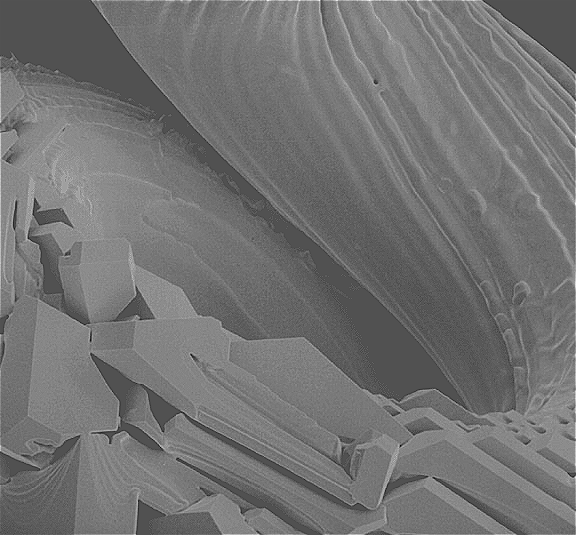

In [ ]:
image_2 = image + laplacian(image, padding=1, type=0)
# Scale for display only
image_2 = (image_2 - image_2.min()) / (image_2.max() - image_2.min())*255
cv2_imshow(image_2)

- **Composite Laplacian** with filter 
$ \begin{pmatrix}
  -1 & -1 & -1 \\
  -1 & 8 & -1 \\
  -1 & -1 & -1
 \end{pmatrix}$ and **Addition**

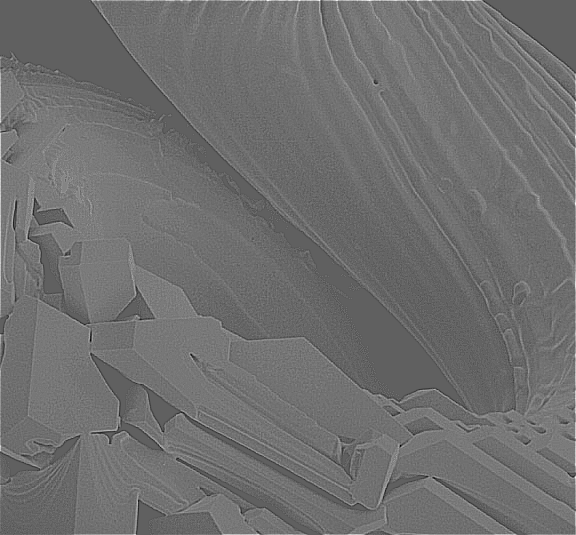

In [ ]:
image_3 = image + laplacian(image, padding=1, type=1)
# Scale for display only
image_3 = (image_3 - image_3.min()) / (image_3.max() - image_3.min())*255
cv2_imshow(image_3)

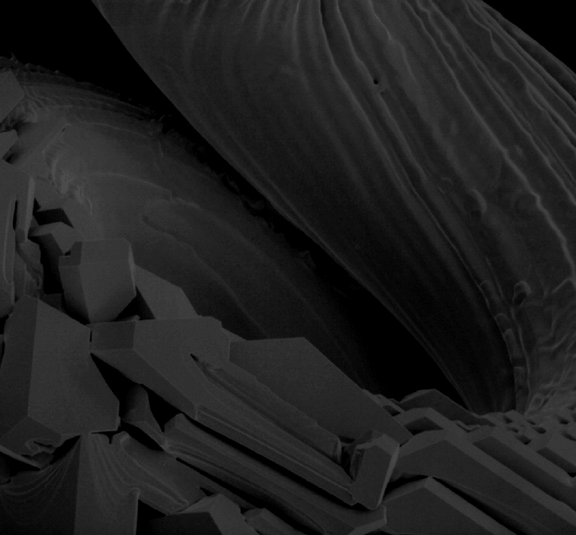

In [ ]:
image = read_image('6.png')
cv2_imshow(image)

- Output_image = 1.8 * input_image + laplacian(input_image)

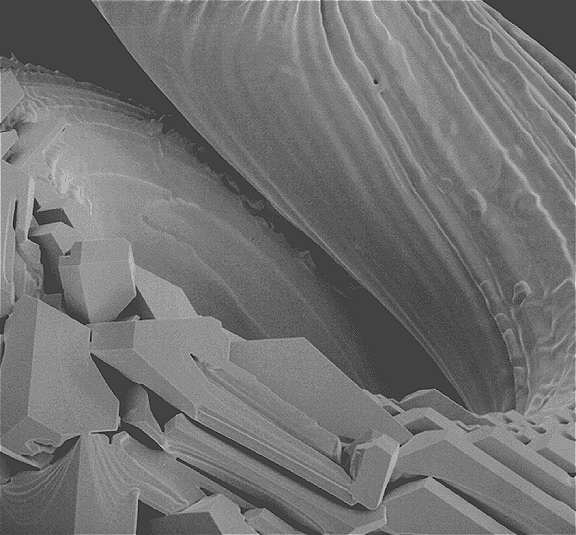

In [ ]:
image_1 = 1.8*image + laplacian(image, padding=1, type=0)
# Scale for display only
image_1 = (image_1 - image_1.min()) / (image_1.max() - image_1.min())*255
cv2_imshow(image_1)

- Output_image = 2.0 * input_image + laplacian(input_image)

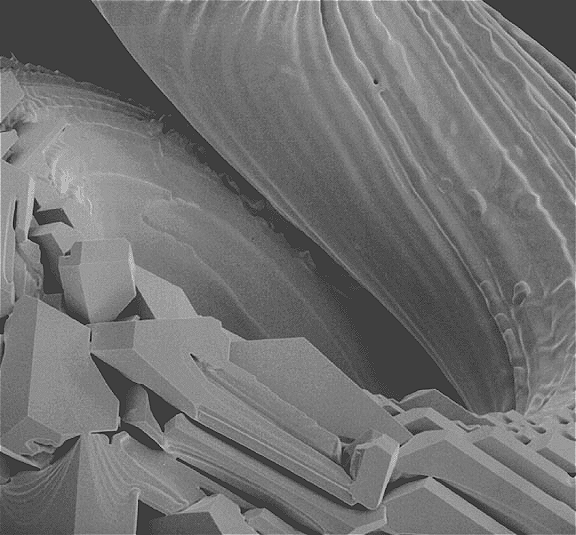

In [ ]:
image_2 = 2*image + laplacian(image, padding=1, type=0)
# Scale for display only
image_2 = (image_2 - image_2.min()) / (image_2.max() - image_2.min())*255
cv2_imshow(image_2)

# Sobel filter

## Function

In [ ]:
#Sobel operators
def Sobel(image, padding):
  kernel_1 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
  kernel_2 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  img_1 = spatial_filter(image, kernel_1, padding)
  img_2 = spatial_filter(image, kernel_2, padding)
  out_image = np.sqrt(np.square(img_1) + np.square(img_2))
  out_image = 255.*out_image/out_image.max()

  return out_image

## Result

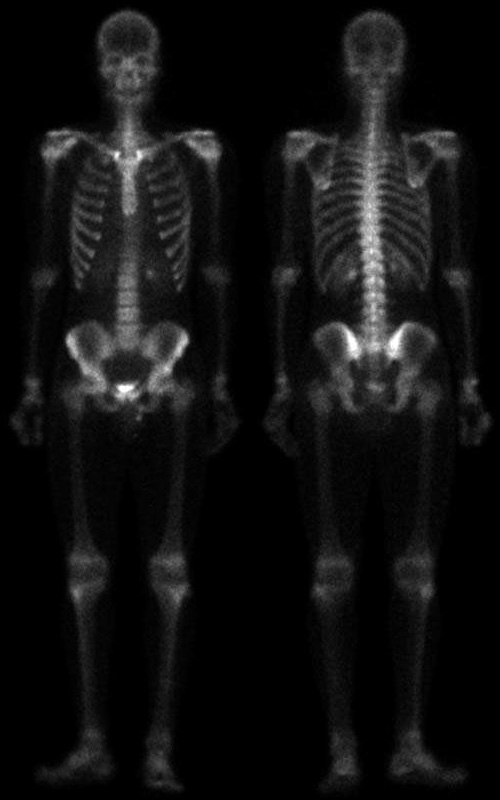

In [ ]:
image = read_image('7.tif')
cv2_imshow(image)

- Output image with Sobel filter

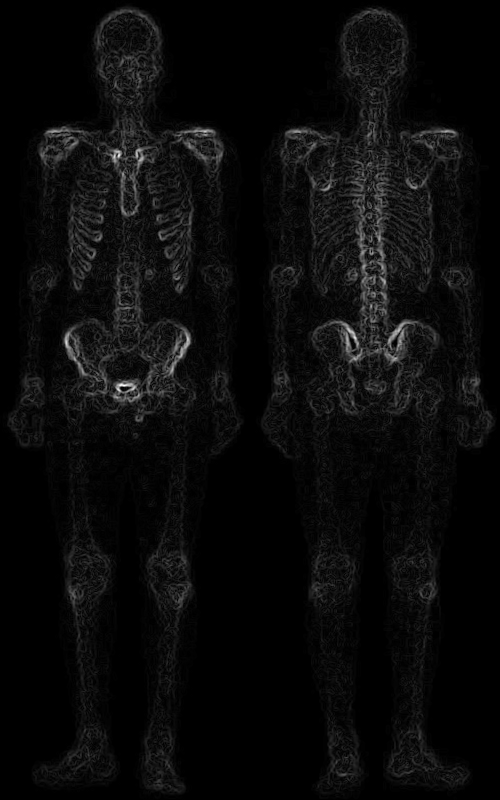

In [ ]:
image_1 = Sobel(image, padding=1)
cv2_imshow(image_1)

# Results

- a image: Image of hole body bone scan

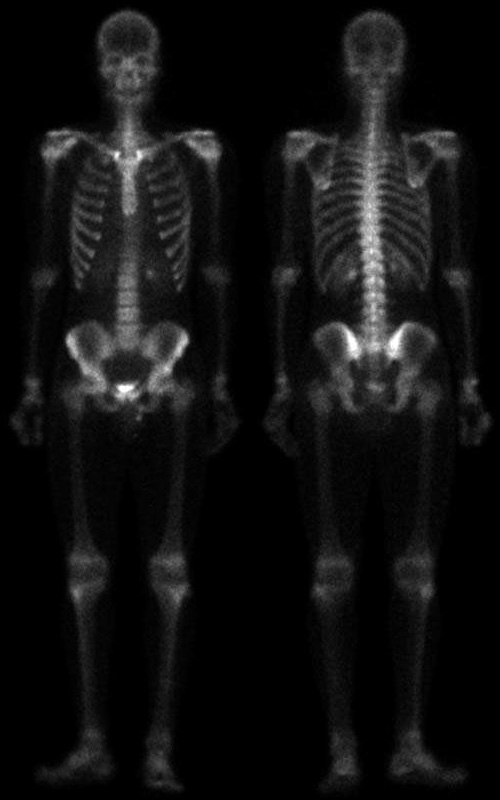

In [ ]:
image = read_image('7.tif')
cv2_imshow(image)

- b image: Laplacian of a

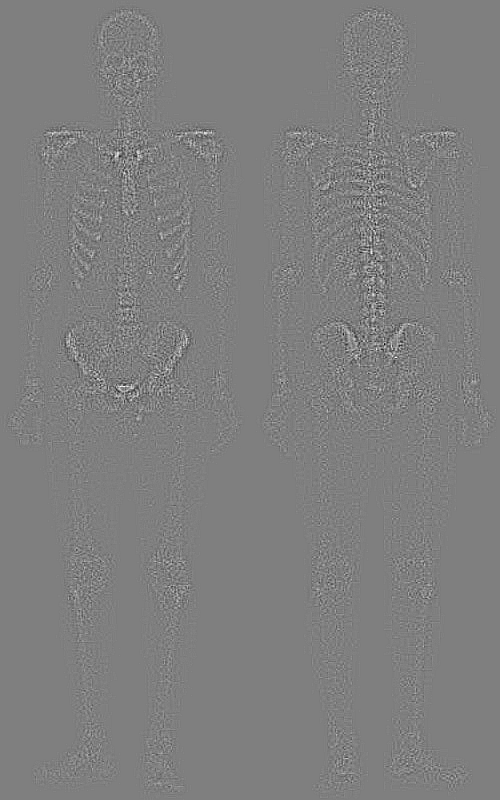

In [ ]:
image_1 = laplacian(image, padding=1, type=1)
dis_image_1 = (image_1 -image_1.min()) / (image_1.max() - image_1.min())*255
cv2_imshow(dis_image_1)

- image c: Sharpened image obtained by adding a and b

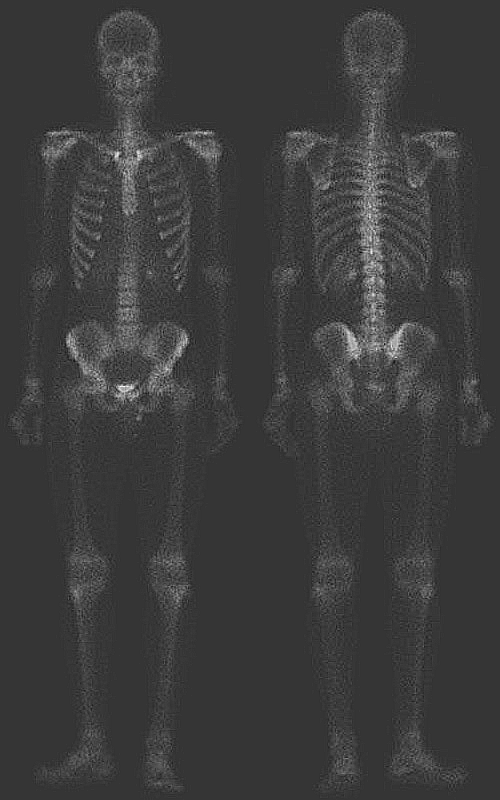

In [ ]:
image_2 = image + image_1
image_2 = (image_2 -image_2.min()) / (image_2.max() - image_2.min())*255
cv2_imshow(image_2)

- image d: Sobel of a

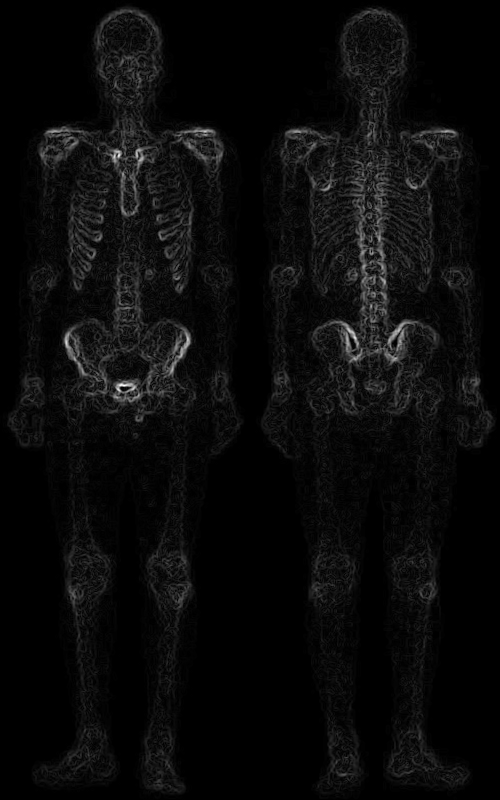

In [ ]:
image_3 = Sobel(image, padding=1)
cv2_imshow(image_3)

- image e: Sobel image smoothed with a 5x5 averaging filter.

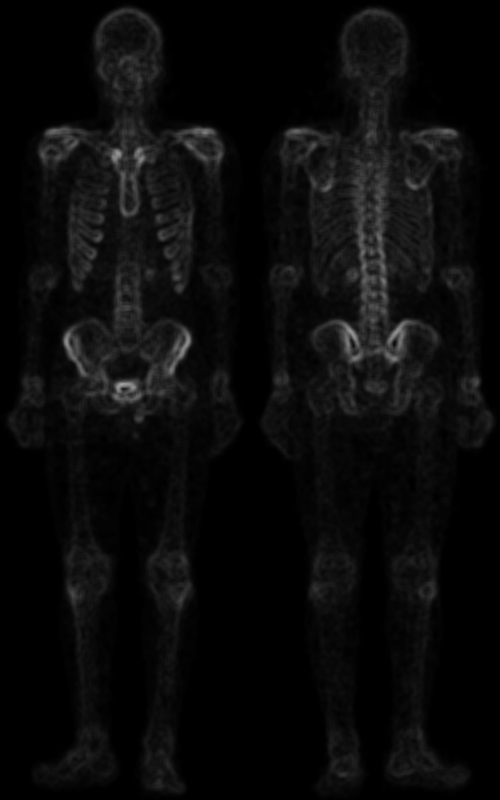

In [ ]:
image_4 = average(image_3, kernel_size=5, padding=1)
cv2_imshow(image_4)

- image f: Mask image formed by the product of c and e

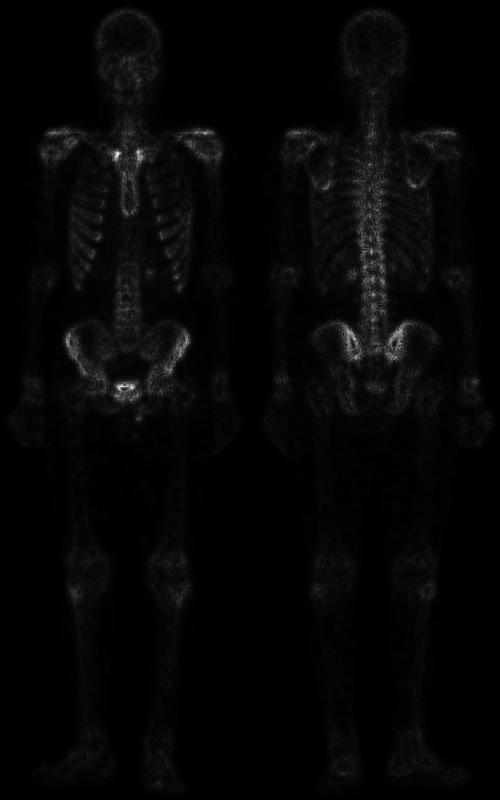

In [ ]:
image_5 = image_4*image_2
image_5 = 255.0* (image_5 - image_5.min()) / (image_5.max() - image_5.min())
cv2_imshow(image_5)

- image g: Shapened image obtained by the sum of a and f

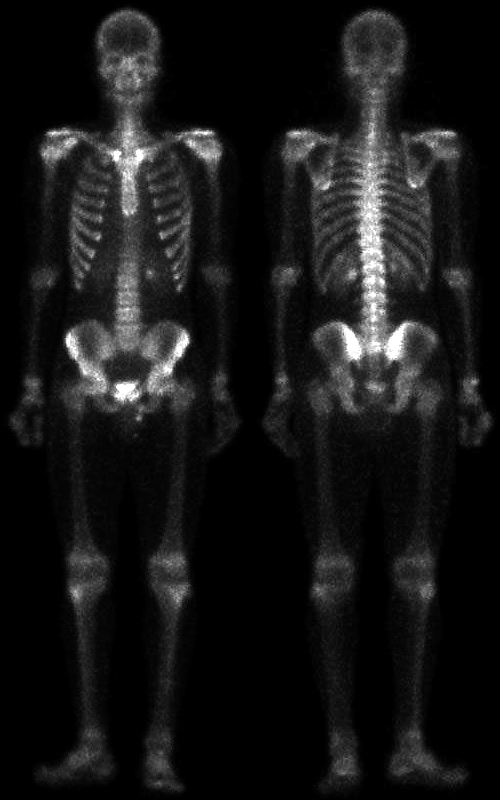

In [ ]:
image_6 = image + image_5
dis_image_6 = 255.0* (image_6 - image_6.min()) / (image_6.max() - image_6.min())
cv2_imshow(image_6)

- image h: Final result obtained by applying a power-law trainformation to g

In [ ]:
def gamma_transform(image, c, gamma):
  image = image / 255.
  return 255*c*(image**gamma)

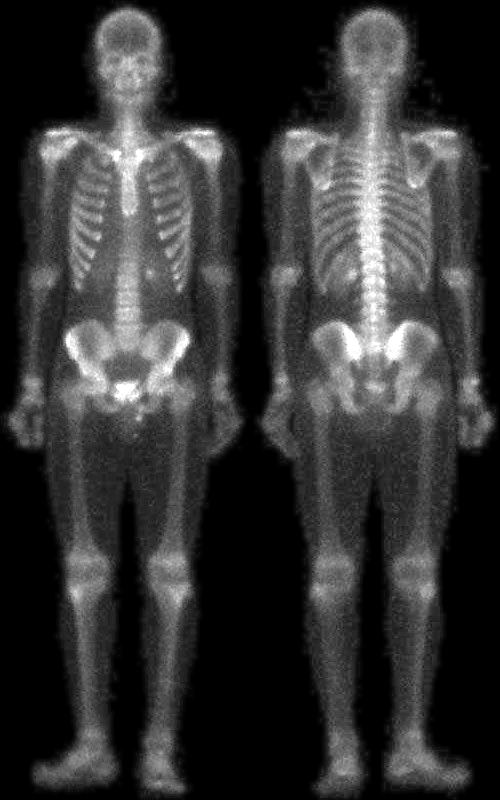

In [ ]:
image_7 = gamma_transform(image_6, c=1, gamma=0.5)
cv2_imshow(image_7)

# Frequency Domain

## Function

In [ ]:
def frequency_domain(image, D0, type, mode = 0, n = 1):
  # type: high or low

    H, W = image.shape
    Huv = np.zeros((H, W))

    if type == 'low':
      for u in range(H):
        for v in range(W):
          Duv = np.sqrt((u - H/2)**2 + (v - W/2)**2)
          
          # ILPF
          if mode == 0:
            if Duv <= D0:
              Huv[u, v] = 1
          
          #BLPF
          elif mode == 1:
            Huv[u, v] = 1 / (1 + (Duv/D0)**(2*n))
          
          #GLPF
          else:
            Huv[u, v] = np.exp(-Duv**2 / (2*(D0**2)))       

    if type == 'high':
      for u in range(H):
        for v in range(W):
          Duv = np.sqrt((u - H/2)**2 + (v - W/2)**2)
          
          # ILPF
          if mode == 0:
            if Duv > D0:
              Huv[u, v] = 1
          
          #BLPF
          elif mode == 1:
            Huv[u, v] = 1 / (1 + (D0/Duv)**(2*n))
          
          #GLPF
          else:
            Huv[u, v] = 1 - np.exp(-Duv**2 / (2*(D0**2)))

    # Computer F(u,v), the FFT of the image
    fft = np.fft.fft2(image.astype(np.float32))
    fft_shift = np.fft.fftshift(fft)

    # Multiply F(u,v) by a filter function H(u,v)
    ILPF_DFT = Huv * fft_shift

    # Compute the inverse FFT of the result
    idft_shift = np.fft.ifftshift(ILPF_DFT)
    image_out = np.real(np.fft.ifft2(idft_shift))
   
    return image_out

## Result

- Load image

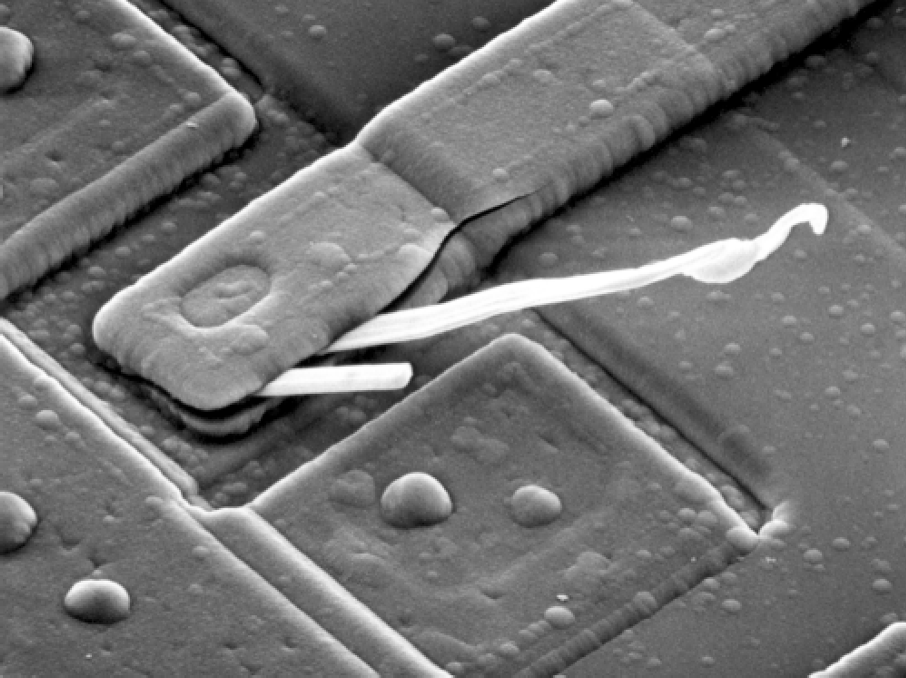

In [ ]:
image = read_image('9.tif')
cv2_imshow(image)

- Ideal Lowpass Filter

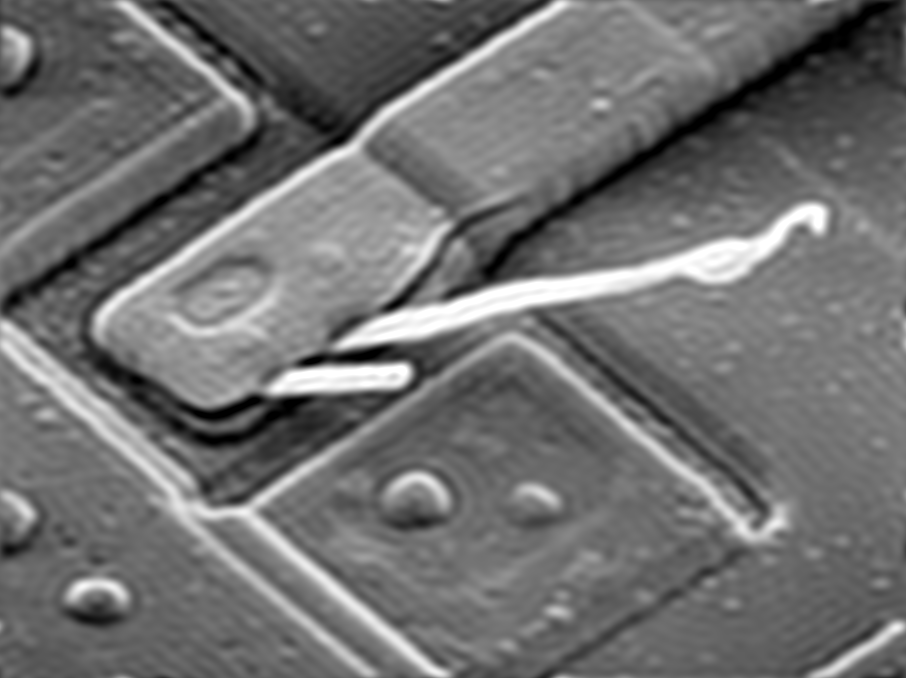

In [ ]:
image_1 = frequency_domain(image, D0=50, type='low', mode = 0, n = 3)
cv2_imshow(image_1)

- Butterworth Lowpass Filters

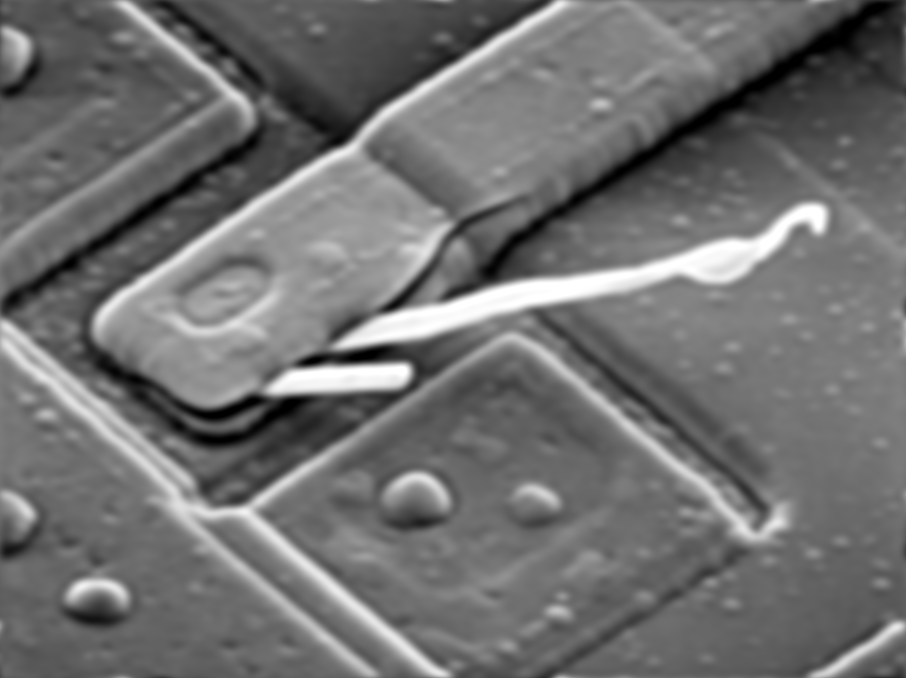

In [ ]:
image_2 = frequency_domain(image, D0=50, type='low', mode = 1, n = 3)
cv2_imshow(image_2)

- Gaussian Lowpass Filters

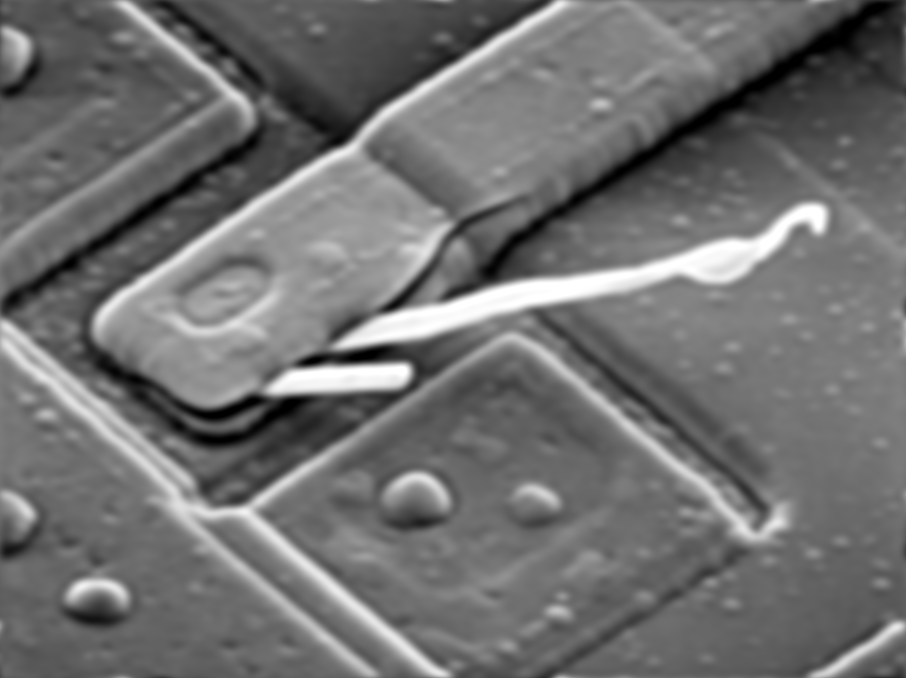

In [ ]:
image_3 = frequency_domain(image, D0=50, type='low', mode = 1, n = 3)
cv2_imshow(image_3)

- Ideal Highpass Filter

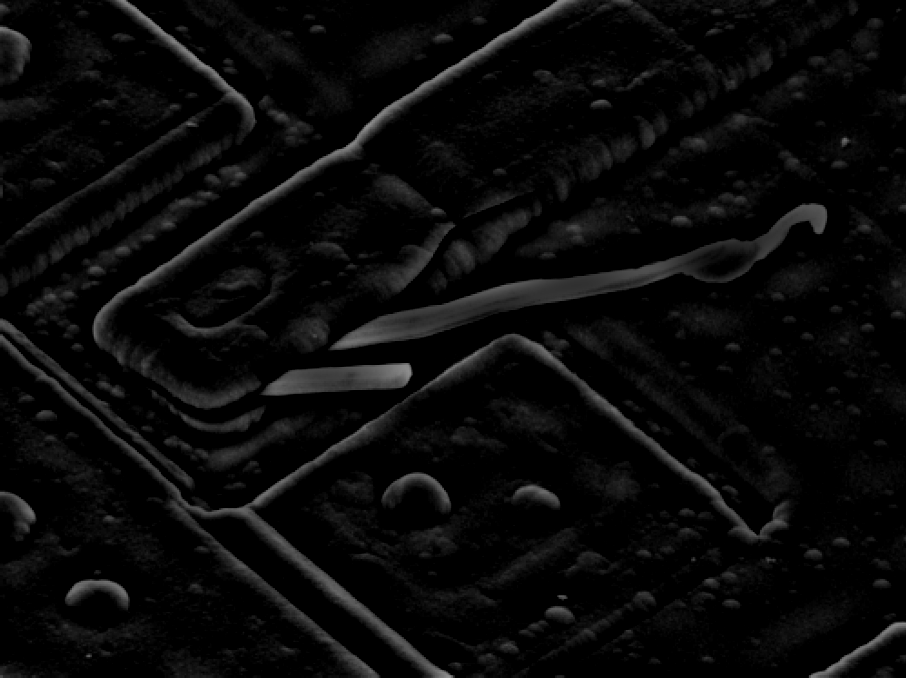

In [ ]:
image_4 = frequency_domain(image, D0=10, type='high', mode = 0, n = 3)
cv2_imshow(image_4)

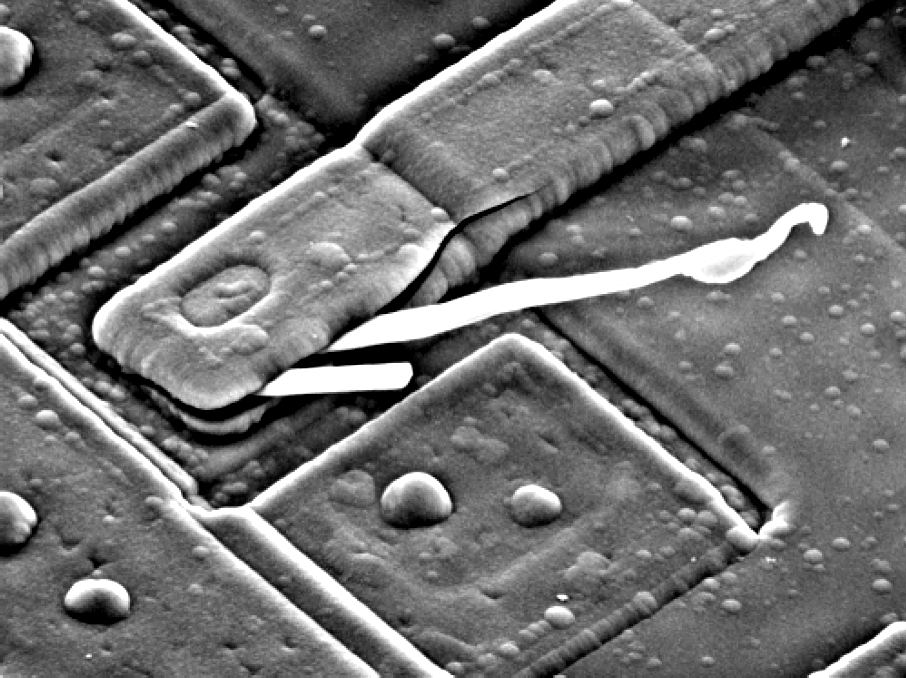

In [ ]:
cv2_imshow(image + image_4)

- Butterworth Highpass Filters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars


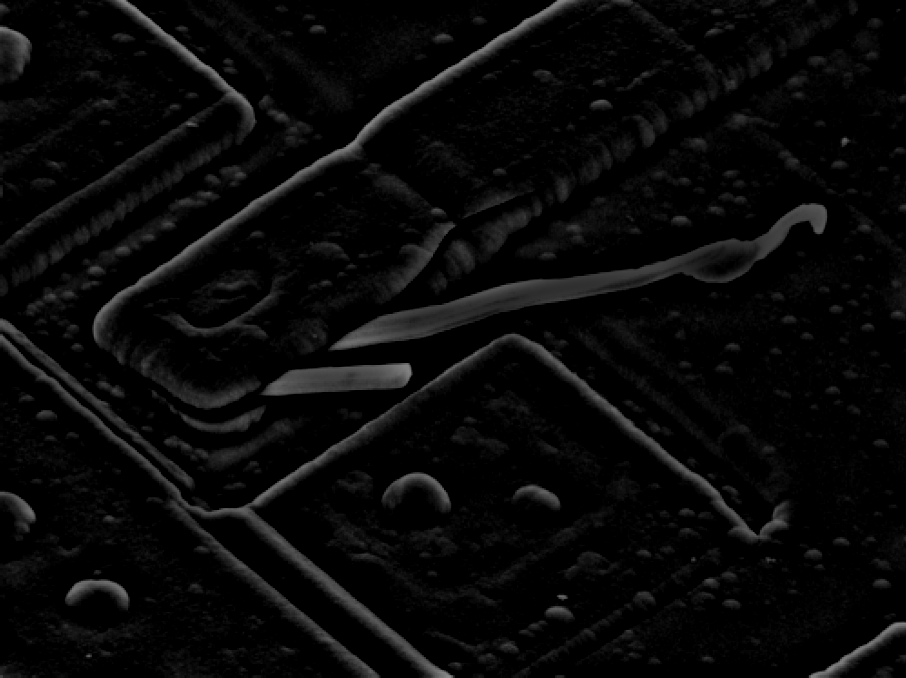

In [ ]:
image_5 = frequency_domain(image, D0=10, type='high', mode = 1, n = 3)
cv2_imshow(image_5)

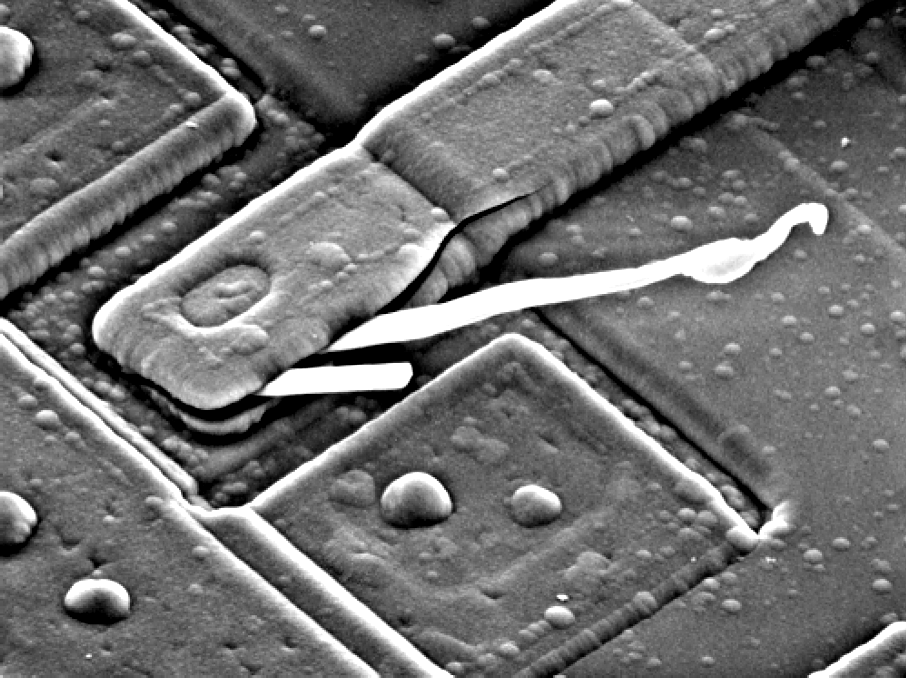

In [ ]:
cv2_imshow(image + image_5)

- Gaussian Highpass Filters

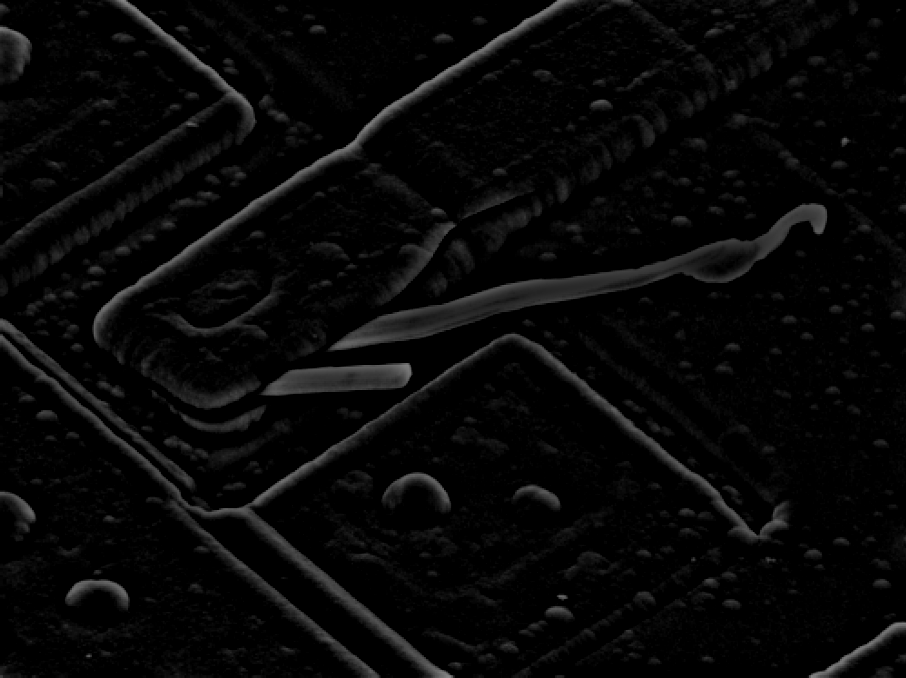

In [ ]:
image_6 = frequency_domain(image, D0=10, type='high', mode = 2, n = 3)
cv2_imshow(image_6)

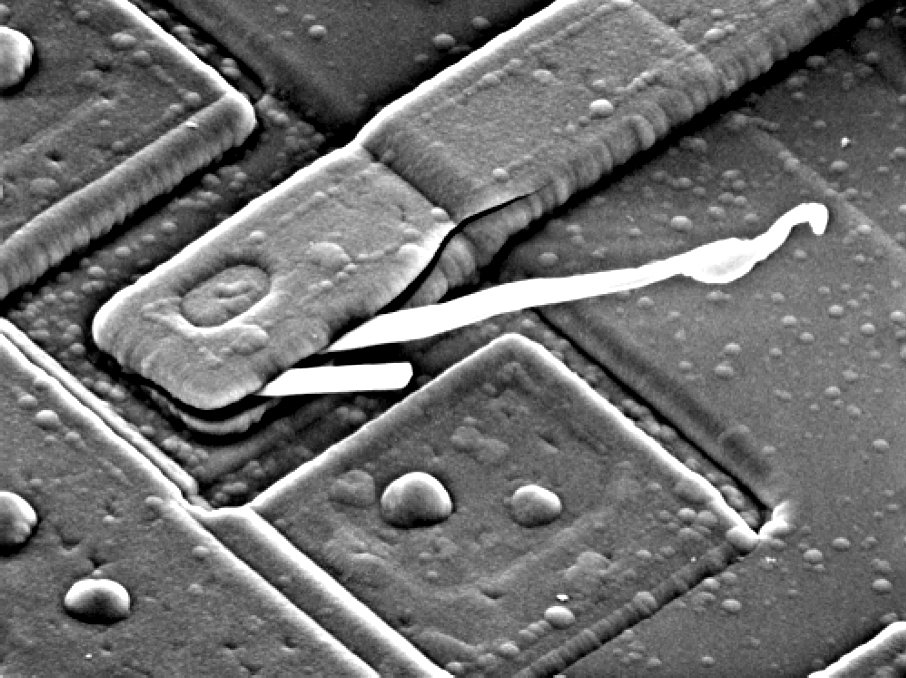

In [ ]:
cv2_imshow(image + image_6)